**Ratail Discount Impact Analyzer**

This project analyzes the impact of discounts on product sales and revenue trends. It helps retailers make informed decision about their discount strategies.

RETAIL DISCOUNT IMPACT ANALYZER

1. Loading data...
No file provided. Generating sample data...
Data loaded successfully with 50 products.
Sample of the loaded data:
             Product   Price  Discount  Pre_Discount_Quantity  \
0      Shampoo Max 1  175.26        10                    399   
1        Soap Lite 2  175.90        10                    238   
2  Shampoo Regular 3  492.87        30                    352   
3   Face Cream Pro 4  251.01        10                    297   
4     Shampoo Lite 5   80.00        15                    165   

   Post_Discount_Quantity  
0                     431  
1                     258  
2                     408  
3                     348  
4                     199  

2. Calculating revenue impact...
Sample of analysis results:
             Product   Price  Discount  Revenue_Change_Pct
0      Shampoo Max 1  175.26        10               -2.78
1        Soap Lite 2  175.90        10               -2.44
2  Shampoo Regular 3  492.87        

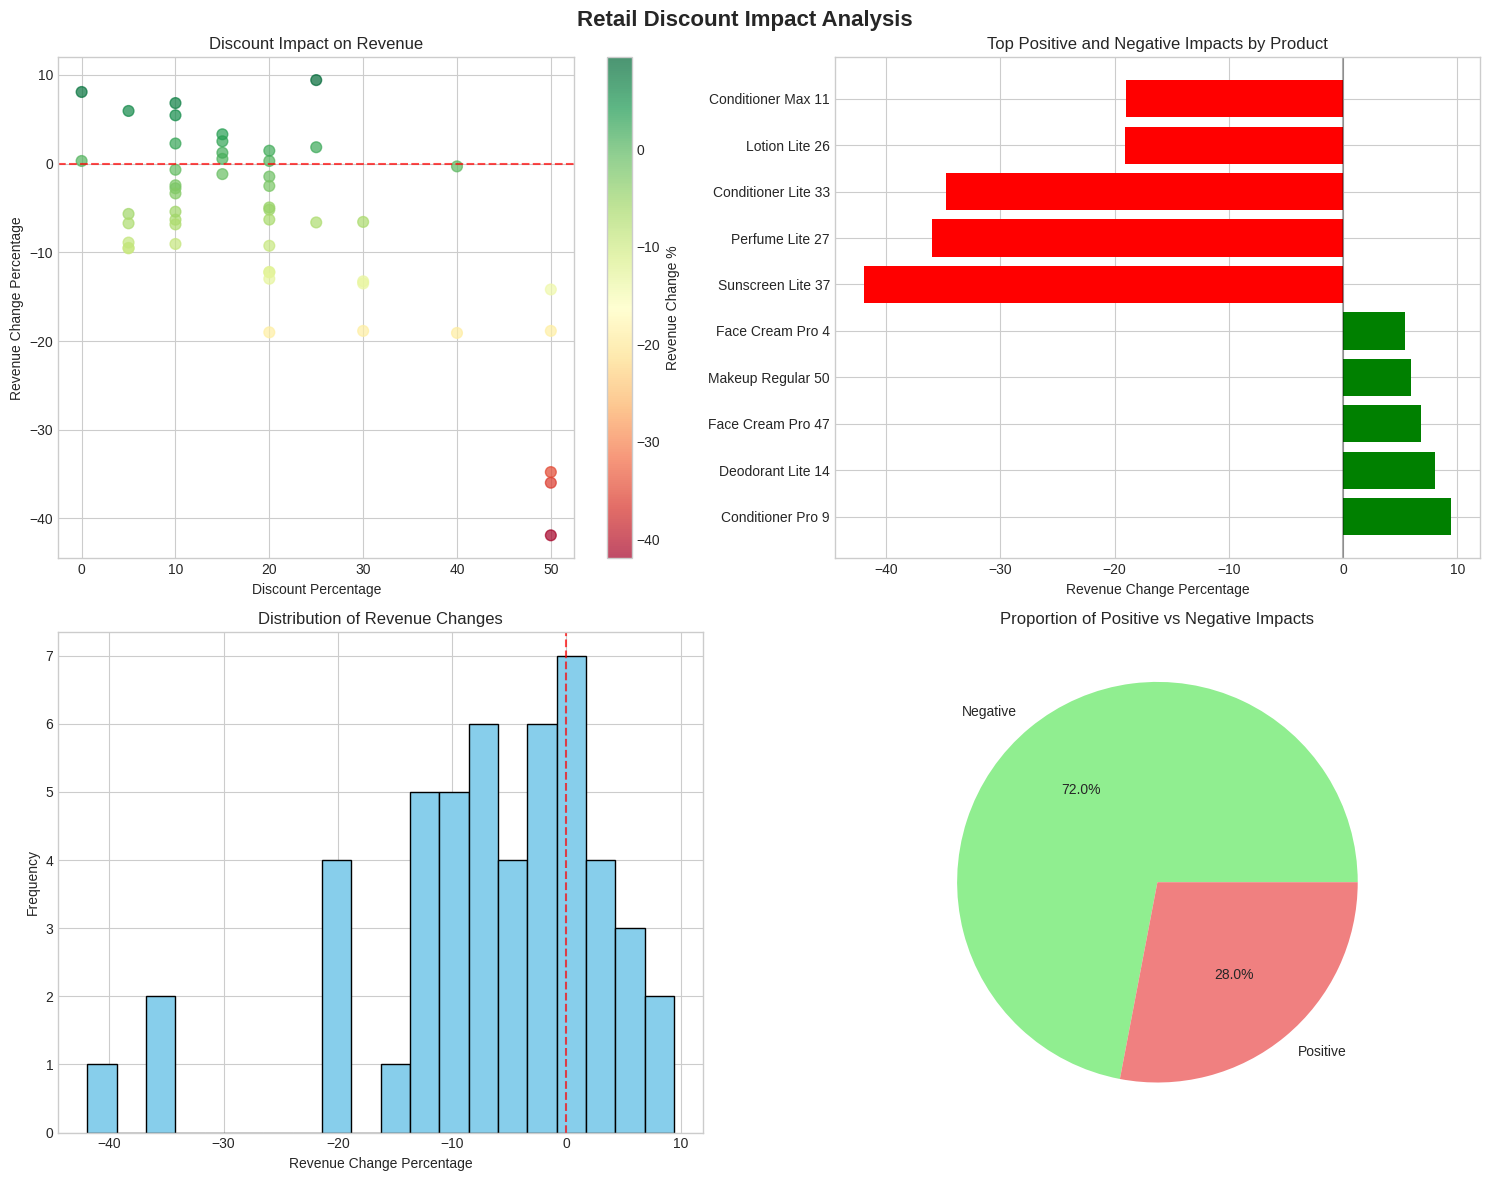

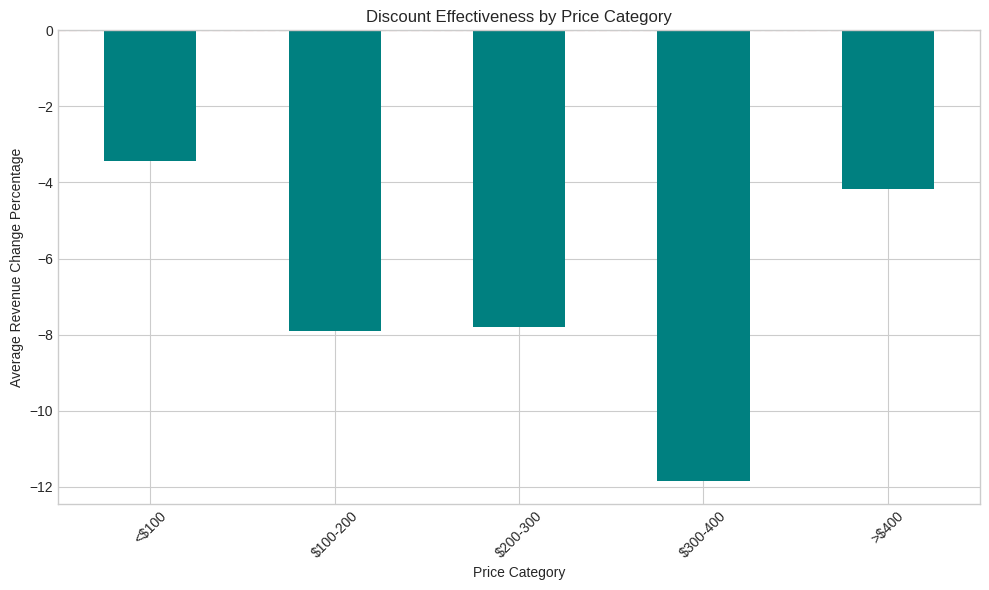


4. Generating recommendations...
Sample recommendations:
             Product   Price  Discount  Revenue_Change_Pct  \
0      Shampoo Max 1  175.26        10               -2.78   
1        Soap Lite 2  175.90        10               -2.44   
2  Shampoo Regular 3  492.87        30              -18.86   
3   Face Cream Pro 4  251.01        10                5.45   
4     Shampoo Lite 5   80.00        15                2.52   

                                 Recommendation  
0          Consider reducing discount gradually  
1          Consider reducing discount gradually  
2       Remove discount to prevent revenue loss  
3  Increase discount to maximize revenue growth  
4               Maintain current discount level  

5. Exporting report...
Report exported successfully to discount_impact_report.xlsx

Analysis complete! Check the generated report and visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

class RetailDiscountAnalyzer:
    """
    A class to analyze the impact of discounts on retail product sales and revenue.
    """

    def __init__(self):
        """Initialize the analyzer with empty datasets."""
        self.sales_data = None
        self.pre_discount_data = None
        self.post_discount_data = None
        self.analysis_results = None

    def generate_sample_data(self, num_products=50):
        """
        Generate sample sales data for demonstration purposes.

        Parameters:
        num_products (int): Number of products to generate data for

        Returns:
        pandas.DataFrame: Sample sales data
        """
        np.random.seed(48)  # For reproducible results

        # Generate product names
        products = []
        categories = ['Shampoo', 'Soap', 'Conditioner', 'Lotion', 'Toothpaste',
                     'Deodorant', 'Face Cream', 'Sunscreen', 'Makeup', 'Perfume']

        for i in range(num_products):
            category = np.random.choice(categories)
            variant = np.random.choice(['Regular', 'Extra', 'Pro', 'Max', 'Lite'])
            products.append(f"{category} {variant} {i+1}")

        # Generate sales data
        data = {
            'Product': products,
            'Price': np.random.uniform(50, 500, num_products).round(2),
            'Discount': np.random.choice([0, 5, 10, 15, 20, 25, 30, 40, 50], num_products,
                                        p=[0.1, 0.15, 0.2, 0.15, 0.1, 0.1, 0.1, 0.05, 0.05]),
            'Pre_Discount_Quantity': np.random.randint(50, 500, num_products),
        }

        # Calculate post-discount quantity with some logic
        data['Post_Discount_Quantity'] = []
        for i in range(num_products):
            base_qty = data['Pre_Discount_Quantity'][i]
            discount = data['Discount'][i]

            # Simulate different customer responses to discounts
            if discount == 0:
                # No discount, slight natural variation
                post_qty = base_qty * np.random.uniform(0.95, 1.05)
            else:
                # With discount, quantity increases based on discount percentage
                # but with diminishing returns
                multiplier = 1 + (discount/100) * np.random.uniform(0.5, 1.5)
                post_qty = base_qty * multiplier

            # Add some randomness
            post_qty = post_qty * np.random.uniform(0.9, 1.1)
            data['Post_Discount_Quantity'].append(int(max(10, post_qty)))

        self.sales_data = pd.DataFrame(data)
        return self.sales_data

    def load_data(self, file_path=None):
        """
        Load sales data from a file or use sample data if no file provided.

        Parameters:
        file_path (str): Path to the data file (CSV or Excel)

        Returns:
        pandas.DataFrame: Sales data
        """
        if file_path:
            if file_path.endswith('.csv'):
                self.sales_data = pd.read_csv(file_path)
            elif file_path.endswith(('.xls', '.xlsx')):
                self.sales_data = pd.read_excel(file_path)
            else:
                raise ValueError("Unsupported file format. Please provide CSV or Excel file.")
        else:
            print("No file provided. Generating sample data...")
            self.sales_data = self.generate_sample_data()

        # Validate required columns
        required_columns = ['Product', 'Price', 'Discount', 'Pre_Discount_Quantity', 'Post_Discount_Quantity']
        for col in required_columns:
            if col not in self.sales_data.columns:
                raise ValueError(f"Required column '{col}' not found in the data.")

        print(f"Data loaded successfully with {len(self.sales_data)} products.")
        return self.sales_data

    def calculate_revenue_impact(self):
        """
        Calculate revenue before and after discount for each product.

        Returns:
        pandas.DataFrame: Analysis results with revenue impact metrics
        """
        if self.sales_data is None:
            raise ValueError("No data loaded. Please load data first.")

        # Calculate revenues
        self.sales_data['Pre_Discount_Revenue'] = self.sales_data['Price'] * self.sales_data['Pre_Discount_Quantity']
        self.sales_data['Post_Discount_Revenue'] = (
            self.sales_data['Price'] * (1 - self.sales_data['Discount']/100) * self.sales_data['Post_Discount_Quantity']
        )

        # Calculate changes
        self.sales_data['Revenue_Change'] = self.sales_data['Post_Discount_Revenue'] - self.sales_data['Pre_Discount_Revenue']
        self.sales_data['Revenue_Change_Pct'] = (
            (self.sales_data['Post_Discount_Revenue'] - self.sales_data['Pre_Discount_Revenue']) /
            self.sales_data['Pre_Discount_Revenue'] * 100
        ).round(2)

        self.sales_data['Quantity_Change_Pct'] = (
            (self.sales_data['Post_Discount_Quantity'] - self.sales_data['Pre_Discount_Quantity']) /
            self.sales_data['Pre_Discount_Quantity'] * 100
        ).round(2)

        # Categorize impact
        self.sales_data['Impact_Type'] = np.where(
            self.sales_data['Revenue_Change'] >= 0, 'Positive', 'Negative'
        )

        self.analysis_results = self.sales_data.copy()
        return self.analysis_results

    def visualize_impact(self):
        """
        Create visualizations to show the impact of discounts on revenue.
        """
        if self.analysis_results is None:
            self.calculate_revenue_impact()

        # Set up the figure
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Retail Discount Impact Analysis', fontsize=16, fontweight='bold')

        # Scatter plot: Discount % vs Revenue Change %
        scatter = axes[0, 0].scatter(
            self.analysis_results['Discount'],
            self.analysis_results['Revenue_Change_Pct'],
            c=self.analysis_results['Revenue_Change_Pct'],
            cmap='RdYlGn',
            alpha=0.7,
            s=60
        )
        axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.7)
        axes[0, 0].set_xlabel('Discount Percentage')
        axes[0, 0].set_ylabel('Revenue Change Percentage')
        axes[0, 0].set_title('Discount Impact on Revenue')
        plt.colorbar(scatter, ax=axes[0, 0], label='Revenue Change %')

        # Bar plot: Top 5 positive and negative impacts
        top_positive = self.analysis_results.nlargest(5, 'Revenue_Change_Pct')
        top_negative = self.analysis_results.nsmallest(5, 'Revenue_Change_Pct')
        top_products = pd.concat([top_positive, top_negative])

        colors = ['green' if x >= 0 else 'red' for x in top_products['Revenue_Change_Pct']]
        bars = axes[0, 1].barh(top_products['Product'], top_products['Revenue_Change_Pct'], color=colors)
        axes[0, 1].set_xlabel('Revenue Change Percentage')
        axes[0, 1].set_title('Top Positive and Negative Impacts by Product')
        axes[0, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

        # Histogram: Distribution of revenue changes
        axes[1, 0].hist(self.analysis_results['Revenue_Change_Pct'], bins=20, color='skyblue', edgecolor='black')
        axes[1, 0].axvline(x=0, color='r', linestyle='--', alpha=0.7)
        axes[1, 0].set_xlabel('Revenue Change Percentage')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Distribution of Revenue Changes')

        # Pie chart: Proportion of positive vs negative impacts
        impact_counts = self.analysis_results['Impact_Type'].value_counts()
        axes[1, 1].pie(impact_counts.values, labels=impact_counts.index,
                       autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
        axes[1, 1].set_title('Proportion of Positive vs Negative Impacts')

        plt.tight_layout()
        plt.savefig('discount_impact_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Additional visualization: Discount effectiveness by price range
        plt.figure(figsize=(10, 6))
        self.analysis_results['Price_Category'] = pd.cut(
            self.analysis_results['Price'],
            bins=[0, 100, 200, 300, 400, 500],
            labels=['<$100', '$100-200', '$200-300', '$300-400', '>$400']
        )

        price_impact = self.analysis_results.groupby('Price_Category')['Revenue_Change_Pct'].mean()
        price_impact.plot(kind='bar', color='teal')
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
        plt.xlabel('Price Category')
        plt.ylabel('Average Revenue Change Percentage')
        plt.title('Discount Effectiveness by Price Category')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('price_category_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

    def generate_recommendations(self):
        """
        Generate recommendations based on the analysis results.

        Returns:
        pandas.DataFrame: Recommendations for each product
        """
        if self.analysis_results is None:
            self.calculate_revenue_impact()

        recommendations = []
        for _, row in self.analysis_results.iterrows():
            if row['Revenue_Change_Pct'] > 5:
                rec = "Increase discount to maximize revenue growth"
            elif row['Revenue_Change_Pct'] > 0:
                rec = "Maintain current discount level"
            elif row['Revenue_Change_Pct'] > -5:
                rec = "Consider reducing discount gradually"
            else:
                rec = "Remove discount to prevent revenue loss"

            recommendations.append({
                'Product': row['Product'],
                'Price': row['Price'],
                'Discount': row['Discount'],
                'Revenue_Change_Pct': row['Revenue_Change_Pct'],
                'Recommendation': rec
            })

        return pd.DataFrame(recommendations)

    def export_report(self, filename='discount_impact_report.xlsx'):
        """
        Export a comprehensive report with analysis results and visualizations.

        Parameters:
        filename (str): Name of the output Excel file
        """
        if self.analysis_results is None:
            self.calculate_revenue_impact()

        # Create Excel writer
        with pd.ExcelWriter(filename, engine='openpyxl') as writer:
            # Summary sheet
            summary_data = {
                'Metric': ['Total Products', 'Products with Positive Impact',
                          'Products with Negative Impact', 'Average Revenue Change %',
                          'Maximum Revenue Increase %', 'Maximum Revenue Decrease %'],
                'Value': [
                    len(self.analysis_results),
                    len(self.analysis_results[self.analysis_results['Impact_Type'] == 'Positive']),
                    len(self.analysis_results[self.analysis_results['Impact_Type'] == 'Negative']),
                    self.analysis_results['Revenue_Change_Pct'].mean(),
                    self.analysis_results['Revenue_Change_Pct'].max(),
                    self.analysis_results['Revenue_Change_Pct'].min()
                ]
            }
            summary_df = pd.DataFrame(summary_data)
            summary_df.to_excel(writer, sheet_name='Summary', index=False)

            # Detailed analysis sheet
            self.analysis_results.to_excel(writer, sheet_name='Detailed Analysis', index=False)

            # Recommendations sheet
            recommendations = self.generate_recommendations()
            recommendations.to_excel(writer, sheet_name='Recommendations', index=False)

        print(f"Report exported successfully to {filename}")

def main():
    """Main function to run the Retail Discount Impact Analyzer."""
    print("=" * 50)
    print("RETAIL DISCOUNT IMPACT ANALYZER")
    print("=" * 50)

    # Initialize analyzer
    analyzer = RetailDiscountAnalyzer()

    # Load data (using sample data for demonstration)
    print("\n1. Loading data...")
    data = analyzer.load_data()
    print("Sample of the loaded data:")
    print(data.head())

    # Calculate revenue impact
    print("\n2. Calculating revenue impact...")
    results = analyzer.calculate_revenue_impact()
    print("Sample of analysis results:")
    print(results[['Product', 'Price', 'Discount', 'Revenue_Change_Pct']].head())

    # Generate visualizations
    print("\n3. Generating visualizations...")
    analyzer.visualize_impact()

    # Generate recommendations
    print("\n4. Generating recommendations...")
    recommendations = analyzer.generate_recommendations()
    print("Sample recommendations:")
    print(recommendations.head())

    # Export report
    print("\n5. Exporting report...")
    analyzer.export_report()

    print("\nAnalysis complete! Check the generated report and visualizations.")

if __name__ == "__main__":
    main()